#### This code is used for auto updating the <a href = 'https://www.kaggle.com/datasets/aryansingh0909/earthquakes-alerts-tweets-dataset-daily-updated'> Earthquakes Alerts Tweets Dataset (Daily Updated)</a>

## Installing snscrape

In [1]:
# pip3 install snscrape

However, this will not be the developer version. Instead, I recommend using the below command to download the snscrape dev version:

Perfect, now that we’ve set up snscrape and peeripheral requirements, let’s jump right into using snscrape!

## Using snscrape

In [2]:
import snscrape.modules.twitter as sntwitter

# Import the 'pandas' library for data manipulation and analysis
import pandas as pd

# Import the 'warnings' module and set up a filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import the 'matplotlib.pyplot' module for creating plots and visualizations
import matplotlib.pyplot as plt

# Import the 'seaborn' library for statistical data visualization
import seaborn as sns

Now, there are two ways of using snscrape

1. Using the command prompt, terminal (Converting JSON files for Python)
2. Using Python Wrapper
I prefer the Python Wrapper method because I believe it's easy to interact with data scraping, rather than engaging in a two-step process with the CLI. However, if you’re interested in knowing the process with CLI, you can refer from <a href = 'https://github.com/MartinKBeck/TwitterScraper/tree/master/snscrape/cli-with-python'> here </a>.


To explain better, wrappers around functions in Python allows modifying behavior of function or class. Basically, the wrapper wraps a second function to extend the behavior of the wrapped function, without permanently altering it.
<!-- [1]: https://github.com/MartinKBeck/TwitterScraper/tree/master/snscrape/cli-with-python -->

## Reading the Old Data from the dataset <a href = 'https://www.kaggle.com/datasets/aryansingh0909/earthquakes-alerts-tweets-dataset-daily-updated'> Earthquakes Alerts Tweets Dataset (Daily Updated) </a>

In [3]:
old_tweets_df = pd.read_csv('D:\Imam\Belajar\Python\Data_Cleaning\Quakes_Country_tweet\QuakesToday.csv', sep=',')
old_tweets_df

,Datetime,Tweet Id,Text,Username
0,2023-05-31 22:31:04+00:00,1664036800384598016,1.6 magnitude #earthquake. 22 km from Encinita...,QuakesToday
1,2023-05-31 22:15:03+00:00,1664032772669984768,"1.8 magnitude #earthquake. 6 km from Volcano, ...",QuakesToday
2,2023-05-31 22:11:03+00:00,1664031765516914688,"5.2 magnitude #earthquake. 11 km from Ambon, M...",QuakesToday
3,2023-05-31 21:59:03+00:00,1664028745299283968,2.1 magnitude #earthquake. Central Alaska http...,QuakesToday
4,2023-05-31 21:46:14+00:00,1664025517560045568,"2.3 magnitude #earthquake. 5 km from Pāhala, H...",QuakesToday
...,...,...,...,...
12580,2023-02-16 22:08:02+00:00,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #...",QuakesToday
12581,2023-02-16 22:06:03+00:00,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow,...",QuakesToday
12582,2023-02-16 21:53:03+00:00,1626338896798961664,"4.8 magnitude #earthquake. Kermadec Islands, N...",QuakesToday
12583,2023-02-16 21:39:03+00:00,1626335374913204225,2.1 magnitude #earthquake. 3 km from ##Holtvil...,QuakesToday


In [4]:
print(len(old_tweets_df))

12585


In [5]:
latest_tweet_id = old_tweets_df.loc[0, 'Tweet Id']
print(latest_tweet_id)

1664036800384598016


## Scraping a specific Twitter user’s tweets

In [6]:
# Creating list to append tweet data 
new_tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:QuakesToday').get_items()): #declare a username 
    if i>1000: #number of tweets you want to scrape
        break
    new_tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username]) #declare the attributes to be returned
    
# Creating a dataframe from the tweets list above 
new_tweets_df = pd.DataFrame(new_tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
print(len(new_tweets_df))

1001


A general execution time for the entire code could be anywhere between 5 mins — 40 mins or even more, depending on the number of tweets fetched by your username or keyword query. If it takes longer than an hour, you might want to check your lines of code.

In [7]:
new_tweets_df.head(10)

,Datetime,Tweet Id,Text,Username
0,2023-06-03 07:00:03+00:00,1664889668553576448,1.6 magnitude #earthquake. 65 km from Searles ...,QuakesToday
1,2023-06-03 06:59:03+00:00,1664889416438140928,"2.8 magnitude #earthquake. 3 km from #Weldon, ...",QuakesToday
2,2023-06-03 06:56:03+00:00,1664888661165617154,4.9 magnitude #earthquake. 154 km from Las Kho...,QuakesToday
3,2023-06-03 06:49:03+00:00,1664886900224851970,4.9 magnitude #earthquake. 141 km from Las Kho...,QuakesToday
4,2023-06-03 06:42:03+00:00,1664885138705252354,5.2 magnitude #earthquake. 143 km from #LasKho...,QuakesToday
5,2023-06-03 06:04:04+00:00,1664875577785065472,1.5 magnitude #earthquake. 32 km from #Nikiski...,QuakesToday
6,2023-06-03 06:04:03+00:00,1664875576421916672,1.8 magnitude #earthquake. 60 km ESE of Ugashi...,QuakesToday
7,2023-06-03 05:37:02+00:00,1664868777312518144,4.3 magnitude #earthquake. Greenland Sea https...,QuakesToday
8,2023-06-03 05:15:03+00:00,1664863244597735425,"4.1 magnitude #earthquake. 146 km WNW of Adak,...",QuakesToday
9,2023-06-03 05:05:03+00:00,1664860727356837889,"2.6 magnitude #earthquake. 9 km from Pāhala, H...",QuakesToday


In [8]:
new_tweets_df.tail(10)

,Datetime,Tweet Id,Text,Username
991,2023-05-24 21:28:04+00:00,1661484232068456448,"1.9 magnitude #earthquake. 10 km from #Anza, #...",QuakesToday
992,2023-05-24 21:28:03+00:00,1661484229224722434,3.0 magnitude #earthquake. 35 km from #Sutton-...,QuakesToday
993,2023-05-24 21:21:03+00:00,1661482466862051328,"2.3 magnitude #earthquake. 7 km from Volcano, ...",QuakesToday
994,2023-05-24 20:51:03+00:00,1661474916850597893,"1.8 magnitude #earthquake. 5 km from #Volcano,...",QuakesToday
995,2023-05-24 20:25:03+00:00,1661468371941199872,"2.0 magnitude #earthquake. 24 km from Volcano,...",QuakesToday
996,2023-05-24 20:24:03+00:00,1661468123508400128,3.2 magnitude #earthquake. 24 km from Stockton...,QuakesToday
997,2023-05-24 20:19:03+00:00,1661466864810356736,"2.7 magnitude #earthquake. 14 km S of Ugashik,...",QuakesToday
998,2023-05-24 19:48:03+00:00,1661459060112363521,"1.6 magnitude #earthquake. 72 km N of Karluk, ...",QuakesToday
999,2023-05-24 19:43:04+00:00,1661457807563182081,"4.6 magnitude #earthquake. 179 km from Lebu, B...",QuakesToday
1000,2023-05-24 19:15:03+00:00,1661450757374353409,"2.3 magnitude #earthquake. 11 km from #Garnet,...",QuakesToday


In [9]:
print(len(new_tweets_df))

1001


In [10]:
index = -1
for i in range(len(new_tweets_df)):
    if(latest_tweet_id == new_tweets_df.loc[i, 'Tweet Id']):
        index = i
        
print(index)
df_temp = new_tweets_df.iloc[:(index + 1), :]
df_temp

264


,Datetime,Tweet Id,Text,Username
0,2023-06-03 07:00:03+00:00,1664889668553576448,1.6 magnitude #earthquake. 65 km from Searles ...,QuakesToday
1,2023-06-03 06:59:03+00:00,1664889416438140928,"2.8 magnitude #earthquake. 3 km from #Weldon, ...",QuakesToday
2,2023-06-03 06:56:03+00:00,1664888661165617154,4.9 magnitude #earthquake. 154 km from Las Kho...,QuakesToday
3,2023-06-03 06:49:03+00:00,1664886900224851970,4.9 magnitude #earthquake. 141 km from Las Kho...,QuakesToday
4,2023-06-03 06:42:03+00:00,1664885138705252354,5.2 magnitude #earthquake. 143 km from #LasKho...,QuakesToday
...,...,...,...,...
260,2023-05-31 23:49:03+00:00,1664056426334142465,3.1 magnitude #earthquake. 74 km from #SanAnto...,QuakesToday
261,2023-05-31 23:44:03+00:00,1664055169183797248,2.1 magnitude #earthquake. 18 km from Summerli...,QuakesToday
262,2023-05-31 23:30:03+00:00,1664051646748577793,"2.4 magnitude #earthquake. 10 km from Garnet, ...",QuakesToday
263,2023-05-31 23:24:04+00:00,1664050138371989508,2.3 magnitude #earthquake. 15 km from #Patters...,QuakesToday


## Updating the New Data in the Old Data

In [11]:
if(index != -1):
    df_temp = df_temp.drop(len(df_temp) - 1, axis = 0)
    df_temp.reset_index(inplace = True, drop = True)
    print(df_temp.head(10))
    print(len(df_temp))
    old_tweets_df = pd.concat([df_temp, old_tweets_df], axis = 0)
    old_tweets_df

                   Datetime             Tweet Id  \
0 2023-06-03 07:00:03+00:00  1664889668553576448   
1 2023-06-03 06:59:03+00:00  1664889416438140928   
2 2023-06-03 06:56:03+00:00  1664888661165617154   
3 2023-06-03 06:49:03+00:00  1664886900224851970   
4 2023-06-03 06:42:03+00:00  1664885138705252354   
5 2023-06-03 06:04:04+00:00  1664875577785065472   
6 2023-06-03 06:04:03+00:00  1664875576421916672   
7 2023-06-03 05:37:02+00:00  1664868777312518144   
8 2023-06-03 05:15:03+00:00  1664863244597735425   
9 2023-06-03 05:05:03+00:00  1664860727356837889   

                                                Text     Username  
0  1.6 magnitude #earthquake. 65 km from Searles ...  QuakesToday  
1  2.8 magnitude #earthquake. 3 km from #Weldon, ...  QuakesToday  
2  4.9 magnitude #earthquake. 154 km from Las Kho...  QuakesToday  
3  4.9 magnitude #earthquake. 141 km from Las Kho...  QuakesToday  
4  5.2 magnitude #earthquake. 143 km from #LasKho...  QuakesToday  
5  1.5 magnitude #e

## Saving the Updated Data

In [12]:
print(len(old_tweets_df))

12849


In [13]:
df = old_tweets_df.copy()

In [14]:
df

,Datetime,Tweet Id,Text,Username
0,2023-06-03 07:00:03+00:00,1664889668553576448,1.6 magnitude #earthquake. 65 km from Searles ...,QuakesToday
1,2023-06-03 06:59:03+00:00,1664889416438140928,"2.8 magnitude #earthquake. 3 km from #Weldon, ...",QuakesToday
2,2023-06-03 06:56:03+00:00,1664888661165617154,4.9 magnitude #earthquake. 154 km from Las Kho...,QuakesToday
3,2023-06-03 06:49:03+00:00,1664886900224851970,4.9 magnitude #earthquake. 141 km from Las Kho...,QuakesToday
4,2023-06-03 06:42:03+00:00,1664885138705252354,5.2 magnitude #earthquake. 143 km from #LasKho...,QuakesToday
...,...,...,...,...
12580,2023-02-16 22:08:02+00:00,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #...",QuakesToday
12581,2023-02-16 22:06:03+00:00,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow,...",QuakesToday
12582,2023-02-16 21:53:03+00:00,1626338896798961664,"4.8 magnitude #earthquake. Kermadec Islands, N...",QuakesToday
12583,2023-02-16 21:39:03+00:00,1626335374913204225,2.1 magnitude #earthquake. 3 km from ##Holtvil...,QuakesToday


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12849 entries, 0 to 12584
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  12849 non-null  object
 1   Tweet Id  12849 non-null  int64 
 2   Text      12849 non-null  object
 3   Username  12849 non-null  object
dtypes: int64(1), object(3)
memory usage: 501.9+ KB


In [16]:
df.isna().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64

In [17]:
# Convert the 'Datetime' column to datetime format using the specified format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S.%f')

# Extract the date from the 'Datetime' column and assign it to the 'Date' column
df['Date'] = pd.to_datetime(df['Datetime']).dt.date

# Extract the time from the 'Datetime' column and assign it to the 'Time' column
df['Time'] = pd.to_datetime(df['Datetime']).dt.time

# Drop the 'Datetime' column from the DataFrame
df.drop(['Datetime'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12849 entries, 0 to 12584
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet Id  12849 non-null  int64 
 1   Text      12849 non-null  object
 2   Username  12849 non-null  object
 3   Date      12849 non-null  object
 4   Time      12849 non-null  object
dtypes: int64(1), object(4)
memory usage: 602.3+ KB


In [19]:
df = df[['Date', 'Time', 'Tweet Id', 'Text', 'Username']]
df

,Date,Time,Tweet Id,Text,Username
0,2023-06-03,07:00:03,1664889668553576448,1.6 magnitude #earthquake. 65 km from Searles ...,QuakesToday
1,2023-06-03,06:59:03,1664889416438140928,"2.8 magnitude #earthquake. 3 km from #Weldon, ...",QuakesToday
2,2023-06-03,06:56:03,1664888661165617154,4.9 magnitude #earthquake. 154 km from Las Kho...,QuakesToday
3,2023-06-03,06:49:03,1664886900224851970,4.9 magnitude #earthquake. 141 km from Las Kho...,QuakesToday
4,2023-06-03,06:42:03,1664885138705252354,5.2 magnitude #earthquake. 143 km from #LasKho...,QuakesToday
...,...,...,...,...,...
12580,2023-02-16,22:08:02,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #...",QuakesToday
12581,2023-02-16,22:06:03,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow,...",QuakesToday
12582,2023-02-16,21:53:03,1626338896798961664,"4.8 magnitude #earthquake. Kermadec Islands, N...",QuakesToday
12583,2023-02-16,21:39:03,1626335374913204225,2.1 magnitude #earthquake. 3 km from ##Holtvil...,QuakesToday


In [20]:
pd.set_option('display.max_colwidth', None)
df['Text'].unique()

array(['1.6 magnitude #earthquake. 65 km from Searles Valley, CA, ##UnitedStates https://t.co/KW98yPhREE',
       '2.8 magnitude #earthquake. 3 km from #Weldon, CA, United States https://t.co/eQD4ruoGQz',
       '4.9 magnitude #earthquake. 154 km from Las Khorey, #Sanaag, Somalia https://t.co/cUlAwC7Qmg',
       ...,
       '4.8 magnitude #earthquake. Kermadec Islands, New Zealand https://t.co/atdgauHafH',
       '2.1 magnitude #earthquake. 3 km from ##Holtville, CA, United States https://t.co/YtaWs8CoPF',
       '1.9 magnitude #earthquake. 4 km from #MammothLakes, CA, United States https://t.co/nh0y2vXwf6'],
      dtype=object)

In [21]:
# Extract the magnitude from the 'Text' column and assign it to the 'Magnitude' column
df['Magnitude'] = df['Text'].str.extract(r'(\d+\.\d+)')

# Extract the location from the 'Text' column and assign it to the 'Location' column
df['Location'] = df['Text'].str.extract(r'(\d+ km .+) https://t.co/')

In [22]:
def split_text(n):
    # Split the text at commas
    split_result = df['Text'].iloc[n].split(', ')
    
    # Check if there are more than 2 parts after splitting at commas
    if len(split_result) > 2:
        split_text = split_result[2]
        
    # Check if there are more than 1 part after splitting at commas
    elif len(split_result) > 1:
        split_text = split_result[1]
        
    else:
        # Split the text at periods
        split_result = df['Text'].iloc[n].split('. ')
        
        # Check if there are at least 2 parts after splitting at periods
        if len(split_result) >= 2:
            split_text = split_result[1]
        else:
            split_text = ''  # Handle cases where splitting doesn't produce enough parts
            
    return split_text

In [23]:
df['Country'] = df.index.map(split_text)

#### From the extraction data we will check if we get Nan data

In [24]:
df

,Date,Time,Tweet Id,Text,Username,Magnitude,Location,Country
0,2023-06-03,07:00:03,1664889668553576448,"1.6 magnitude #earthquake. 65 km from Searles Valley, CA, ##UnitedStates https://t.co/KW98yPhREE",QuakesToday,1.6,"65 km from Searles Valley, CA, ##UnitedStates",##UnitedStates https://t.co/KW98yPhREE
1,2023-06-03,06:59:03,1664889416438140928,"2.8 magnitude #earthquake. 3 km from #Weldon, CA, United States https://t.co/eQD4ruoGQz",QuakesToday,2.8,"3 km from #Weldon, CA, United States",United States https://t.co/eQD4ruoGQz
2,2023-06-03,06:56:03,1664888661165617154,"4.9 magnitude #earthquake. 154 km from Las Khorey, #Sanaag, Somalia https://t.co/cUlAwC7Qmg",QuakesToday,4.9,"154 km from Las Khorey, #Sanaag, Somalia",Somalia https://t.co/cUlAwC7Qmg
3,2023-06-03,06:49:03,1664886900224851970,"4.9 magnitude #earthquake. 141 km from Las Khorey, #Sanaag, Somalia https://t.co/3wj4vFeYUY",QuakesToday,4.9,"141 km from Las Khorey, #Sanaag, Somalia",Somalia https://t.co/3wj4vFeYUY
4,2023-06-03,06:42:03,1664885138705252354,"5.2 magnitude #earthquake. 143 km from #LasKhorey, Sanaag, Somalia https://t.co/UBTwaaJjjE",QuakesToday,5.2,"143 km from #LasKhorey, Sanaag, Somalia",Somalia https://t.co/UBTwaaJjjE
...,...,...,...,...,...,...,...,...
12580,2023-02-16,22:08:02,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #AK, United States https://t.co/tSFzBcv6F7",QuakesToday,1.7,"52 km from Homer, #AK, United States",Dominican Republic https://t.co/KMfME6WcnS
12581,2023-02-16,22:06:03,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow, AK, United States https://t.co/MxATnkiXzn",QuakesToday,3.0,"41 km from #Willow, AK, United States",United States https://t.co/QTDXlUTkPE
12582,2023-02-16,21:53:03,1626338896798961664,"4.8 magnitude #earthquake. Kermadec Islands, New Zealand https://t.co/atdgauHafH",QuakesToday,4.8,NaN,Philippines https://t.co/eOqqJNeIEb
12583,2023-02-16,21:39:03,1626335374913204225,"2.1 magnitude #earthquake. 3 km from ##Holtville, CA, United States https://t.co/YtaWs8CoPF",QuakesToday,2.1,"3 km from ##Holtville, CA, United States",United States https://t.co/CwSmvz8WGd


In [25]:
df.isna().sum()

Date           0
Time           0
Tweet Id       0
Text           0
Username       0
Magnitude      0
Location     834
Country        0
dtype: int64

In [26]:
df.dropna(inplace = True)

In [27]:
# Remove the '#' character from the 'Country' column
df['Country'] = df['Country'].str.replace('#', '')

In [28]:
# Extract the 'Link_Map' from the 'Country' column using a regular expression pattern
df['Link_Map'] = df['Country'].str.extract(r'(https://t.co/.+)')

# Extract the country from the 'Country' column using a regular expression pattern
df['Country'] = df['Country'].str.extract(r'(\S.+) https://t.co/')

In [29]:
df

,Date,Time,Tweet Id,Text,Username,Magnitude,Location,Country,Link_Map
0,2023-06-03,07:00:03,1664889668553576448,"1.6 magnitude #earthquake. 65 km from Searles Valley, CA, ##UnitedStates https://t.co/KW98yPhREE",QuakesToday,1.6,"65 km from Searles Valley, CA, ##UnitedStates",UnitedStates,https://t.co/KW98yPhREE
1,2023-06-03,06:59:03,1664889416438140928,"2.8 magnitude #earthquake. 3 km from #Weldon, CA, United States https://t.co/eQD4ruoGQz",QuakesToday,2.8,"3 km from #Weldon, CA, United States",United States,https://t.co/eQD4ruoGQz
2,2023-06-03,06:56:03,1664888661165617154,"4.9 magnitude #earthquake. 154 km from Las Khorey, #Sanaag, Somalia https://t.co/cUlAwC7Qmg",QuakesToday,4.9,"154 km from Las Khorey, #Sanaag, Somalia",Somalia,https://t.co/cUlAwC7Qmg
3,2023-06-03,06:49:03,1664886900224851970,"4.9 magnitude #earthquake. 141 km from Las Khorey, #Sanaag, Somalia https://t.co/3wj4vFeYUY",QuakesToday,4.9,"141 km from Las Khorey, #Sanaag, Somalia",Somalia,https://t.co/3wj4vFeYUY
4,2023-06-03,06:42:03,1664885138705252354,"5.2 magnitude #earthquake. 143 km from #LasKhorey, Sanaag, Somalia https://t.co/UBTwaaJjjE",QuakesToday,5.2,"143 km from #LasKhorey, Sanaag, Somalia",Somalia,https://t.co/UBTwaaJjjE
...,...,...,...,...,...,...,...,...,...
12579,2023-02-16,22:14:04,1626344183933050881,"1.9 magnitude #earthquake. 8 km from #Ridgecrest, CA, #UnitedStates https://t.co/i0iisBlTcL",QuakesToday,1.9,"8 km from #Ridgecrest, CA, #UnitedStates",Alaska,https://t.co/3PzAxgFobh
12580,2023-02-16,22:08:02,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #AK, United States https://t.co/tSFzBcv6F7",QuakesToday,1.7,"52 km from Homer, #AK, United States",Dominican Republic,https://t.co/KMfME6WcnS
12581,2023-02-16,22:06:03,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow, AK, United States https://t.co/MxATnkiXzn",QuakesToday,3.0,"41 km from #Willow, AK, United States",United States,https://t.co/QTDXlUTkPE
12583,2023-02-16,21:39:03,1626335374913204225,"2.1 magnitude #earthquake. 3 km from ##Holtville, CA, United States https://t.co/YtaWs8CoPF",QuakesToday,2.1,"3 km from ##Holtville, CA, United States",United States,https://t.co/CwSmvz8WGd


In [30]:
df['Country'].unique()

array(['UnitedStates', 'United States', 'Somalia', 'Alaska', 'Peru',
       'Vanuatu', 'Puerto Rico', 'Argentina', 'Philippines',
       'DominicanRepublic', 'Russia', 'Indonesia', 'Nicaragua', 'Tonga',
       'Fiji', 'Greece', 'Papua New Guinea', 'PuertoRico',
       'U.S.VirginIslands', 'Guam', 'Solomon Islands', 'China',
       'U.S. Virgin Islands', 'Guatemala', 'PapuaNewGuinea',
       'Ascension Island region', 'Southern Alaska', 'Fiji region',
       'Banda Sea', 'Kuril Islands', 'Southeast of the Loyalty Islands',
       'Northern Mariana Islands', 'Revilla Gigedo Islands region',
       'Mexico', 'Alaska Peninsula', 'Myanmar', 'Ecuador',
       'South of the Fiji Islands', 'South Sandwich Islands region',
       'Turkmenistan', 'New Zealand region', 'Japan', 'Gulf of Alaska',
       'Tajikistan', 'Chile', 'Northern Alaska', 'Japan region',
       'Southwest of Africa', 'Vanuatu region', 'Central Alaska',
       'Dominican Republic', 'Colombia', 'Owen Fracture Zone region',
   

In [31]:
df['Country'] = df['Country'].str.replace(' ', '')

In [32]:
df

,Date,Time,Tweet Id,Text,Username,Magnitude,Location,Country,Link_Map
0,2023-06-03,07:00:03,1664889668553576448,"1.6 magnitude #earthquake. 65 km from Searles Valley, CA, ##UnitedStates https://t.co/KW98yPhREE",QuakesToday,1.6,"65 km from Searles Valley, CA, ##UnitedStates",UnitedStates,https://t.co/KW98yPhREE
1,2023-06-03,06:59:03,1664889416438140928,"2.8 magnitude #earthquake. 3 km from #Weldon, CA, United States https://t.co/eQD4ruoGQz",QuakesToday,2.8,"3 km from #Weldon, CA, United States",UnitedStates,https://t.co/eQD4ruoGQz
2,2023-06-03,06:56:03,1664888661165617154,"4.9 magnitude #earthquake. 154 km from Las Khorey, #Sanaag, Somalia https://t.co/cUlAwC7Qmg",QuakesToday,4.9,"154 km from Las Khorey, #Sanaag, Somalia",Somalia,https://t.co/cUlAwC7Qmg
3,2023-06-03,06:49:03,1664886900224851970,"4.9 magnitude #earthquake. 141 km from Las Khorey, #Sanaag, Somalia https://t.co/3wj4vFeYUY",QuakesToday,4.9,"141 km from Las Khorey, #Sanaag, Somalia",Somalia,https://t.co/3wj4vFeYUY
4,2023-06-03,06:42:03,1664885138705252354,"5.2 magnitude #earthquake. 143 km from #LasKhorey, Sanaag, Somalia https://t.co/UBTwaaJjjE",QuakesToday,5.2,"143 km from #LasKhorey, Sanaag, Somalia",Somalia,https://t.co/UBTwaaJjjE
...,...,...,...,...,...,...,...,...,...
12579,2023-02-16,22:14:04,1626344183933050881,"1.9 magnitude #earthquake. 8 km from #Ridgecrest, CA, #UnitedStates https://t.co/i0iisBlTcL",QuakesToday,1.9,"8 km from #Ridgecrest, CA, #UnitedStates",Alaska,https://t.co/3PzAxgFobh
12580,2023-02-16,22:08:02,1626342669235662848,"1.7 magnitude #earthquake. 52 km from Homer, #AK, United States https://t.co/tSFzBcv6F7",QuakesToday,1.7,"52 km from Homer, #AK, United States",DominicanRepublic,https://t.co/KMfME6WcnS
12581,2023-02-16,22:06:03,1626342168704212992,"3.0 magnitude #earthquake. 41 km from #Willow, AK, United States https://t.co/MxATnkiXzn",QuakesToday,3.0,"41 km from #Willow, AK, United States",UnitedStates,https://t.co/QTDXlUTkPE
12583,2023-02-16,21:39:03,1626335374913204225,"2.1 magnitude #earthquake. 3 km from ##Holtville, CA, United States https://t.co/YtaWs8CoPF",QuakesToday,2.1,"3 km from ##Holtville, CA, United States",UnitedStates,https://t.co/CwSmvz8WGd


In [33]:
df['Country'].nunique()

173

In [34]:
df.isna().sum()

Date         0
Time         0
Tweet Id     0
Text         0
Username     0
Magnitude    0
Location     0
Country      1
Link_Map     0
dtype: int64

In [35]:
df.dropna(inplace = True)

In [36]:
old_tweets_df.to_csv('QuakesToday.csv', index = False)

In [37]:
# See the 5 highest news for earthquake 
df['Country'].value_counts().head(5)

UnitedStates    6872
Alaska          1655
PuertoRico      1059
Indonesia        201
Japan            135
Name: Country, dtype: int64

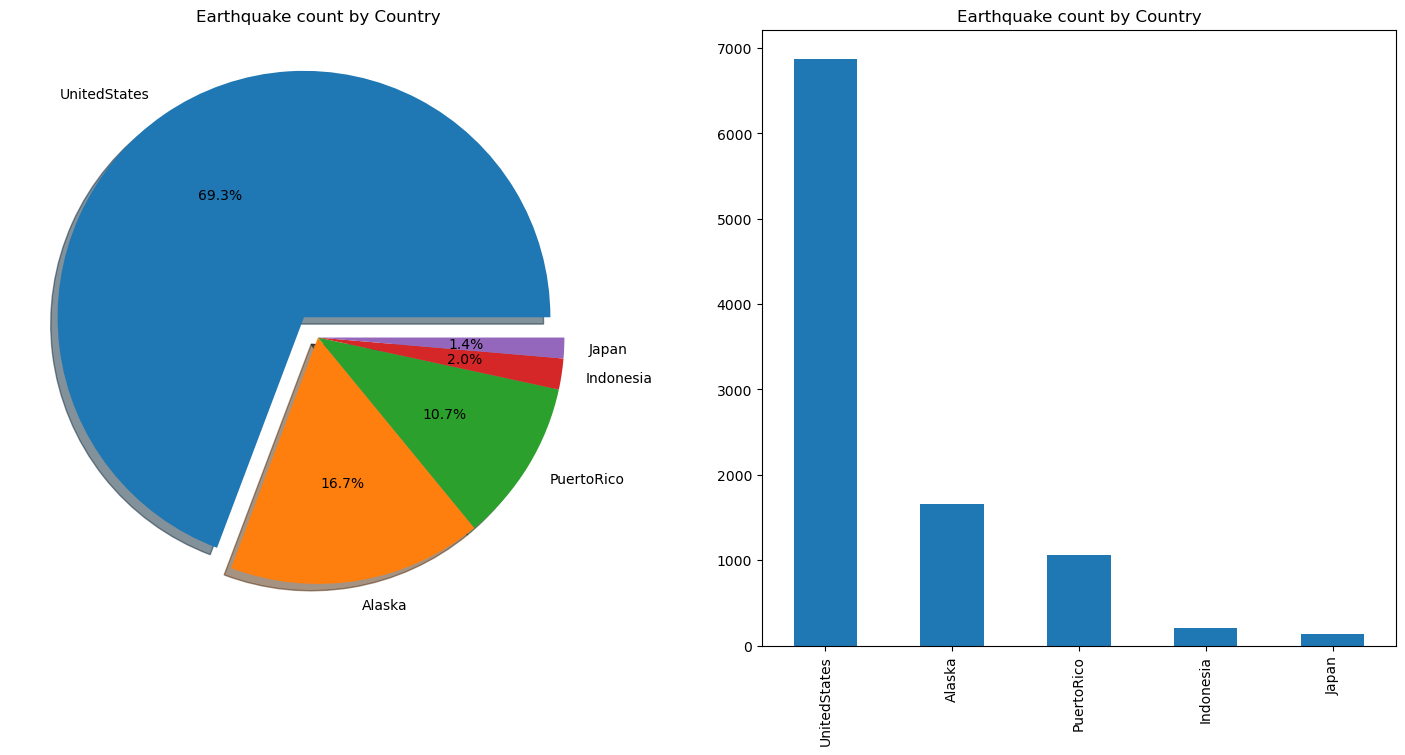

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plotting pie chart for 'Country' column
df['Country'].value_counts().head(5).plot.pie(explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Earthquake count by Country')
ax[0].set_ylabel('')

# Plotting countplot for 'Country' column
ax[1] = df['Country'].value_counts().head(5).plot.bar()
ax[1].set_title('Earthquake count by Country')

plt.show()  # Display the figure

The dataset will automatically get updated from the output of this notebook.

Thanks for reading:)